# Análisando dados sobre taxa de suicidios em Portugal 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()
%matplotlib inline

In [2]:
#importando os dados .csv
dados= pd.read_csv("suicide_rates.csv")

In [3]:
dados.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
#Importando os dados temos nomes em Englês então vamos muda-lo para português:

In [5]:
dados.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [6]:
colunas={
    
    'country':"País", 
    'year':"Ano_dados_foram_registados", 
    'sex':"Sexo", 
    'age':"Faixa_etaria_considerada", 
    'suicides_no':"Numero_suicidios", 
    'population':"populacao_para_grupo",
    'suicides/100k pop':"Numero_suicidio_por_100mil_habitantes", 
    'country-year':"País-Ano", 
    
}

dados.rename(colunas,axis=1,inplace=True)

In [7]:
dados.head()

,País,Ano_dados_foram_registados,Sexo,Faixa_etaria_considerada,Numero_suicidios,populacao_para_grupo,Numero_suicidio_por_100mil_habitantes,País-Ano,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# Pegando Dados de Portugal

In [8]:
dados_portugal=dados[dados.País=="Portugal"].copy()

In [9]:
#Vendo as Primeiras Linhas
dados_portugal.head()

,País,Ano_dados_foram_registados,Sexo,Faixa_etaria_considerada,Numero_suicidios,populacao_para_grupo,Numero_suicidio_por_100mil_habitantes,País-Ano,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
19356,Portugal,1985,male,75+ years,89,160554,55.43,Portugal1985,0.676,"27,118,476,174",2912,G.I. Generation
19357,Portugal,1985,male,55-74 years,245,805542,30.41,Portugal1985,0.676,"27,118,476,174",2912,G.I. Generation
19358,Portugal,1985,male,35-54 years,185,1103803,16.76,Portugal1985,0.676,"27,118,476,174",2912,Silent
19359,Portugal,1985,female,75+ years,39,288221,13.53,Portugal1985,0.676,"27,118,476,174",2912,G.I. Generation
19360,Portugal,1985,male,25-34 years,87,703271,12.37,Portugal1985,0.676,"27,118,476,174",2912,Boomers


In [10]:
#Vendo as 5 ultimas Linhas
dados_portugal.tail()

,País,Ano_dados_foram_registados,Sexo,Faixa_etaria_considerada,Numero_suicidios,populacao_para_grupo,Numero_suicidio_por_100mil_habitantes,País-Ano,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
19675,Portugal,2014,male,15-24 years,28,562495,4.98,Portugal2014,0.83,"229,629,822,122",23091,Millenials
19676,Portugal,2014,female,25-34 years,21,638072,3.29,Portugal2014,0.83,"229,629,822,122",23091,Millenials
19677,Portugal,2014,female,15-24 years,8,545684,1.47,Portugal2014,0.83,"229,629,822,122",23091,Millenials
19678,Portugal,2014,female,5-14 years,2,511478,0.39,Portugal2014,0.83,"229,629,822,122",23091,Generation Z
19679,Portugal,2014,male,5-14 years,0,537929,0.00,Portugal2014,0.83,"229,629,822,122",23091,Generation Z


## Vendo qual ano teve mais impacto



In [11]:
maisImpacto=dados["Ano_dados_foram_registados"].value_counts()

In [12]:
maisImpacto

2009    1068
2001    1056
2010    1056
2007    1032
2011    1032
2002    1032
2003    1032
2000    1032
2006    1020
2008    1020
2005    1008
2004    1008
1999     996
2012     972
2013     960
1998     948
2014     936
1995     936
1996     924
1997     924
1994     816
1992     780
1993     780
1990     768
1991     768
2015     744
1987     648
1989     624
1988     588
1986     576
1985     576
2016     160
Name: Ano_dados_foram_registados, dtype: int64

## Pode-mos ver que Em portugal o ano que teve mais Incidente foi em 2009

Depois cada ano que passava de incidente diminuia

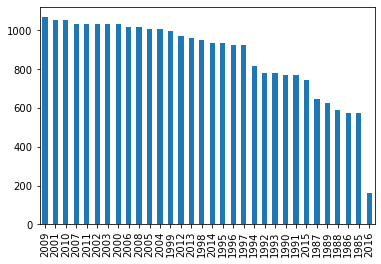

In [13]:
maisImpacto.plot(kind="bar")

## Vendo quais as idades foram mais afetadas

In [14]:
vendo_idades_mais_afetadas=pd.pivot_table(dados,values="Numero_suicidios",index="Ano_dados_foram_registados",columns="Faixa_etaria_considerada")

In [15]:
vendo_idades_mais_afetadas

Faixa_etaria_considerada,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
Ano_dados_foram_registados,,,,,,
1985,186.145833,216.364583,372.375000,10.250000,299.333333,124.520833
1986,188.156250,225.885417,391.229167,9.833333,310.000000,131.875000
1987,152.148148,206.564815,376.379630,8.657407,300.638889,130.074074
1988,156.500000,217.673469,395.612245,8.540816,311.612245,145.020408
1989,179.192308,282.951923,514.817308,11.057692,385.451923,167.336538
1990,181.625000,275.593750,509.703125,11.539062,367.328125,164.843750
1991,182.164062,278.242188,534.171875,11.976562,377.460938,163.015625
1992,190.207692,290.446154,577.315385,12.976923,396.200000,159.569231
1993,194.323077,300.338462,620.538462,13.761538,417.523077,157.861538


# Análisando os 2 Gráfico podemos ver:

Vemos que na Faixetaria que vai dos 35 aos 54 tem um indice de suicidio maior que as outras faixetarias.


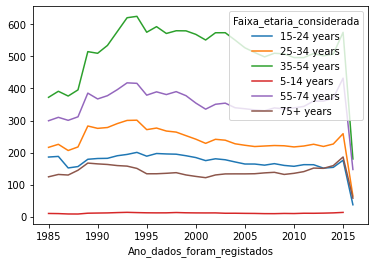

In [16]:
vendo_idades_mais_afetadas.plot()

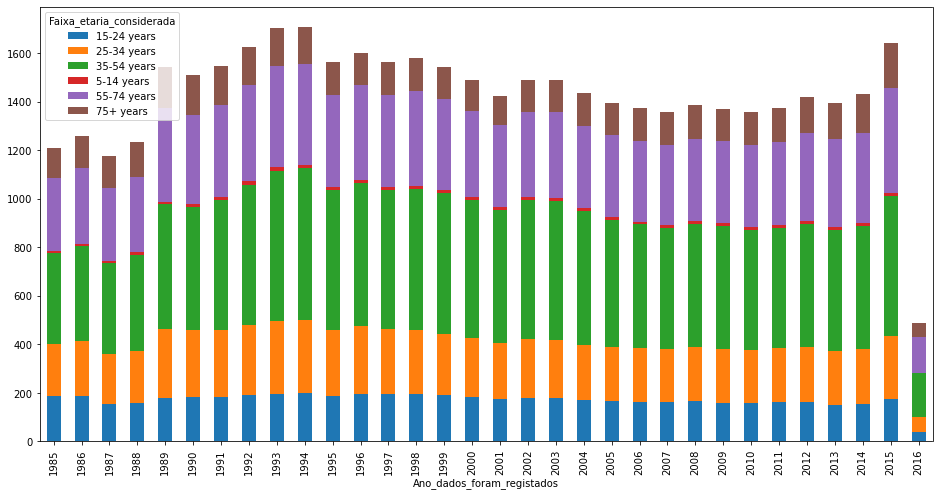

In [17]:
vendo_idades_mais_afetadas.plot.bar(stacked=True,figsize=(16,8))

# Vendo qual sexo tem maior nível de suicidio

In [18]:
sexo_maior_nivel_suicidio=dados.groupby("Sexo").Numero_suicidios.sum()

In [19]:
sexo_maior_nivel_suicidio

Sexo
female    1559510
male      5188910
Name: Numero_suicidios, dtype: int64

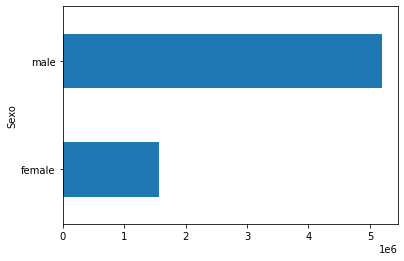

In [20]:
sexo_maior_nivel_suicidio.plot.barh()

In [21]:
#Analisando o gráfico de barra de cima vemos que o Sexo que tem maior nível de suicidio é Masculino

([<matplotlib.patches.Wedge at 0x1978a302100>,
 [Text(0.8226203305813468, 0.7302710398983627, 'Mulheres'),
  Text(-0.8226203647678005, -0.7302710013887248, 'Homens')],
 [Text(0.44870199849891634, 0.3983296581263796, '23.1%'),
  Text(-0.448702017146073, -0.3983296371211226, '76.9%')])

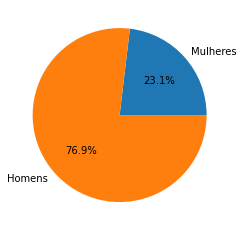

In [22]:
plt.pie(sexo_maior_nivel_suicidio,labels=["Mulheres","Homens"],autopct="%1.1f%%")

In [23]:
#Analisando o gráfico de pizza que está  acima vemos que o Sexo que tem maior nível de suicidio é Masculino